In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 18px;
}

div.output_area pre {
    font-size: 16px;
}
</style>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import ipywidgets as widgets
from IPython.display import display

In [4]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## PART 1: DESCRIPTIVE ANALYTICS

### Descriptive analysis by advanced chart type

In [5]:
# Load data
df = pd.read_csv('data/Burn_out_cs.csv')

# Data exploration
print("Shape of the data:", df.shape)
print("\nColumns of the data:", df.columns)
print("\nData types of columns:\n", df.dtypes)

# Descriptive statistics
print("\nDescriptive statistics:\n", df.describe())

Shape of the data: (21626, 8)

Columns of the data: Index(['Date of joining', 'Gender', 'Company Type', 'WFH Setup Available',
       'Level', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

Data types of columns:
 Date of joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Level                     int64
Resource Allocation       int64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

Descriptive statistics:
               Level  Resource Allocation  Mental Fatigue Score     Burn Rate
count  21626.000000         21626.000000          21626.000000  21626.000000
mean       2.178766             4.455239              5.745154      0.452005
std        1.135428             1.990000              1.833016      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.700000      

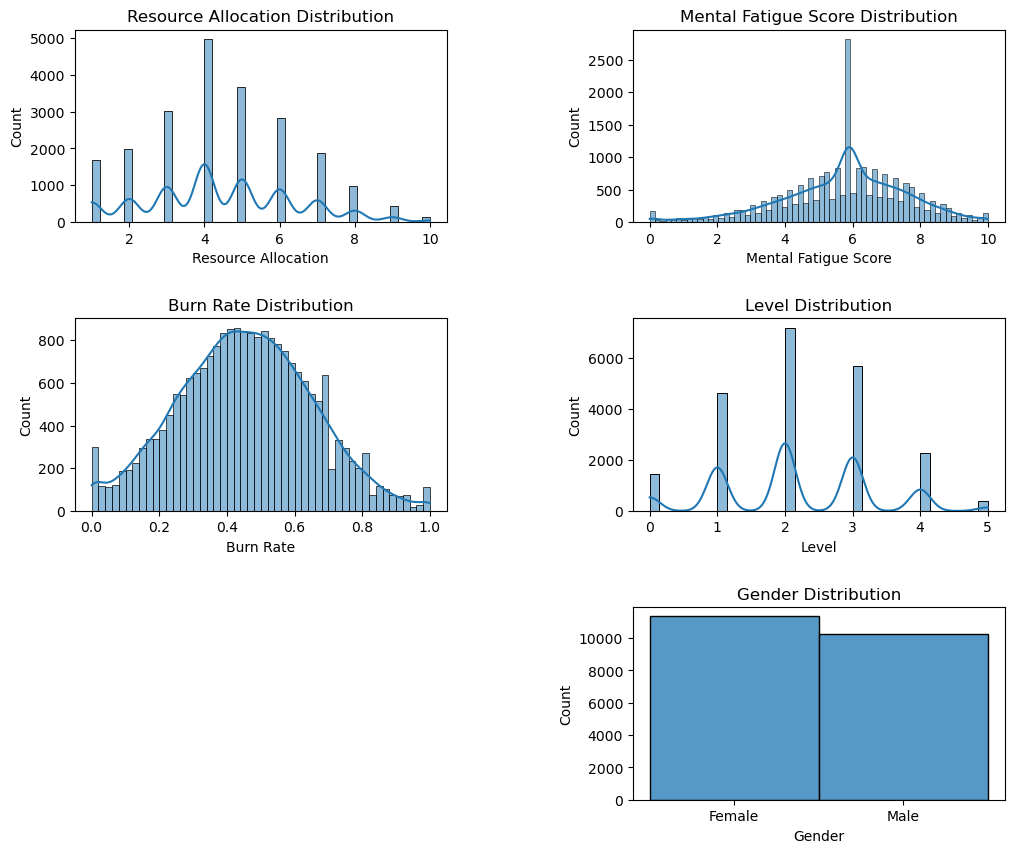

In [6]:
# Distribution plots
plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(3, 2, 1)
sns.histplot(data=df, x='Resource Allocation', kde=True)
plt.title('Resource Allocation Distribution')

plt.subplot(3, 2, 2)
sns.histplot(data=df, x='Mental Fatigue Score', kde=True)
plt.title('Mental Fatigue Score Distribution')

plt.subplot(3, 2, 3)
sns.histplot(data=df, x='Burn Rate', kde=True)
plt.title('Burn Rate Distribution')

plt.subplot(3, 2, 4)
sns.histplot(data=df, x='Level', kde=True)
plt.title('Level Distribution')

plt.subplot(3, 2, 6)
sns.histplot(data=df, x='Gender', kde=False)
plt.title('Gender Distribution')
#plt.legend()

plt.show()

### Number of employees per company:

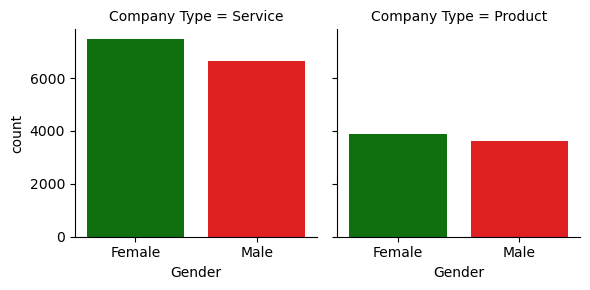

In [68]:
employee_number = sns.FacetGrid(df, col='Company Type')

# Draw countplot()
employee_number.map_dataframe(sns.countplot, 
                      x='Gender', 
                      palette=['g','r'],
                     )

plt.show()

### Number of working hours of employees by position (Level):

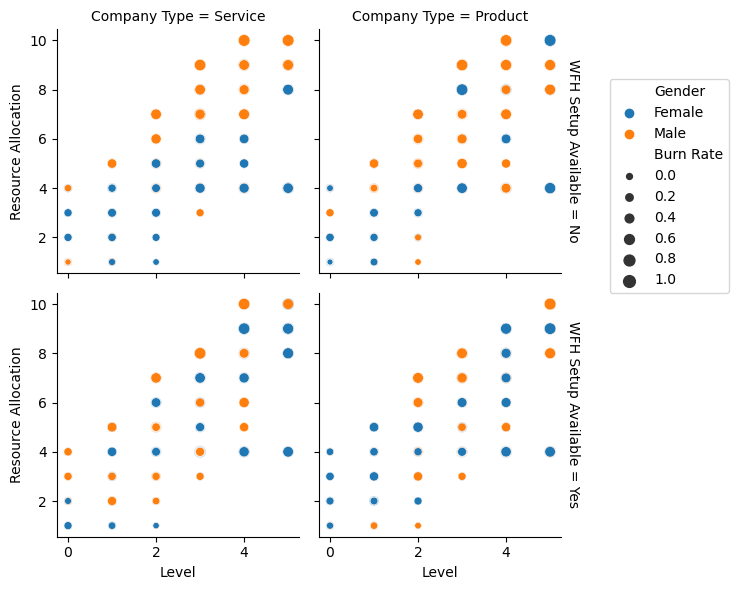

In [69]:
working_hour = sns.FacetGrid(df, col='Company Type', row='WFH Setup Available',
                              margin_titles=True)

working_hour.map_dataframe(sns.scatterplot, 'Level', 'Resource Allocation', 
                       size = 'Burn Rate', hue = 'Gender')
plt.legend(loc=[1.2,1])

plt.show()

### Correlation between Burn Rate and other values

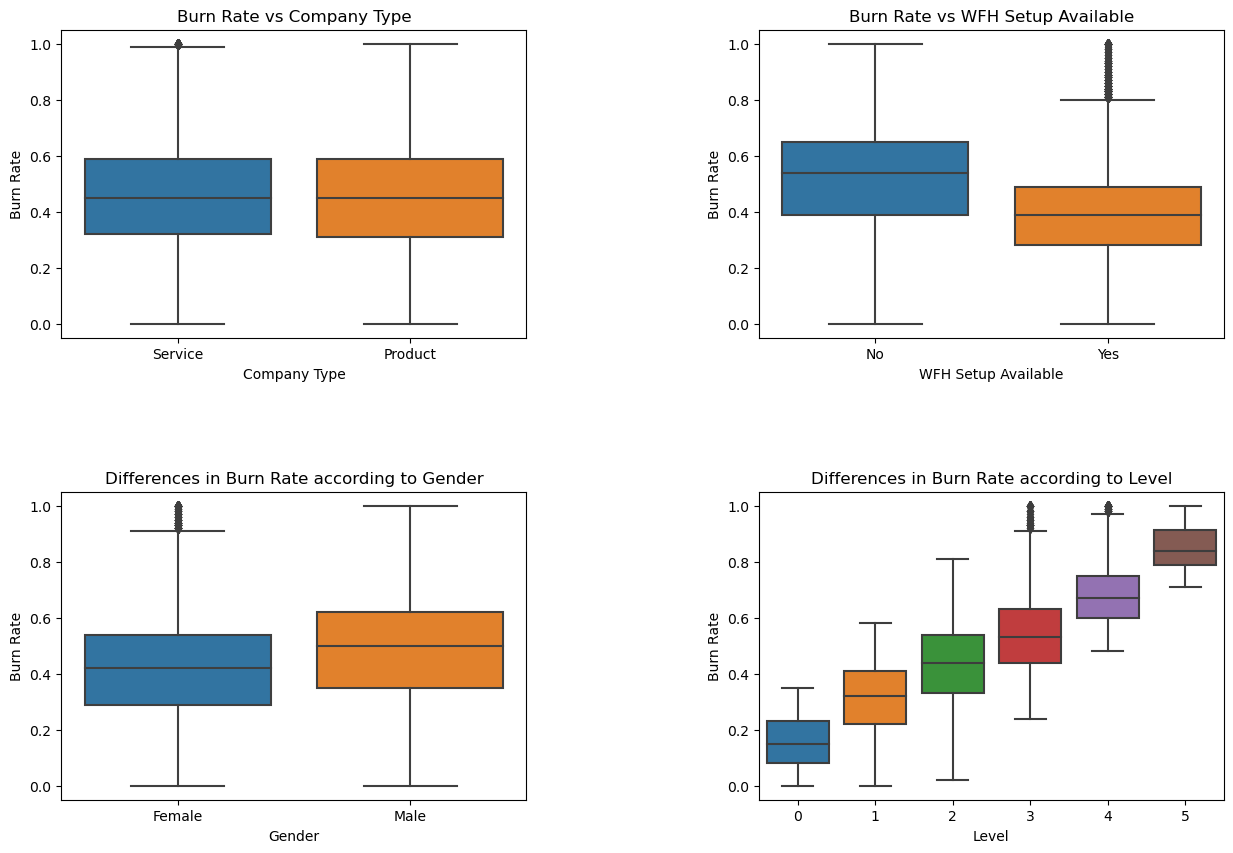

In [70]:
# Boxplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Company Type', y='Burn Rate')
plt.title('Burn Rate vs Company Type')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='WFH Setup Available', y='Burn Rate')
plt.title('Burn Rate vs WFH Setup Available')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Gender', y='Burn Rate')
plt.title('Differences in Burn Rate according to Gender')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Level', y='Burn Rate')
plt.title('Differences in Burn Rate according to Level')

plt.show()

### Advanced charts

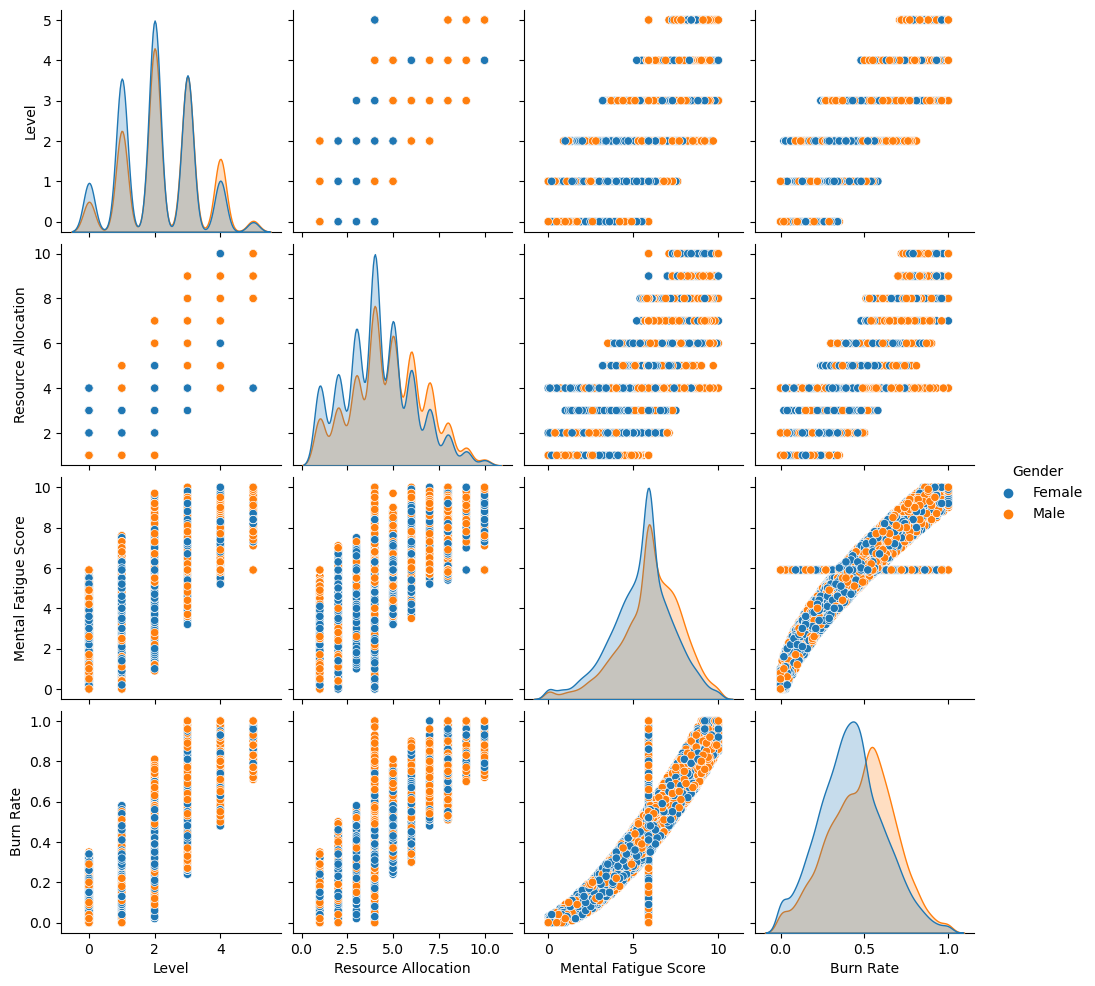

In [10]:
sns.pairplot(df, diag_kind ='kde',hue = 'Gender')
plt.show()

In [11]:
df_heatmap = df.drop(['Date of joining','Gender','Company Type',
                      'WFH Setup Available'], axis = 1)
df_heatmap

,Level,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2,3,3.8,0.16
1,1,2,5.0,0.36
2,2,4,5.8,0.49
3,1,1,2.6,0.20
4,3,7,6.9,0.52
...,...,...,...,...
21621,1,3,5.9,0.41
21622,3,6,6.7,0.59
21623,3,7,5.9,0.72
21624,2,5,5.9,0.52


In [12]:
corr = df_heatmap.corr()
corr

,Level,Resource Allocation,Mental Fatigue Score,Burn Rate
Level,1.000000,0.851383,0.657882,0.737556
Resource Allocation,0.851383,1.000000,0.740061,0.829632
Mental Fatigue Score,0.657882,0.740061,1.000000,0.898926
Burn Rate,0.737556,0.829632,0.898926,1.000000


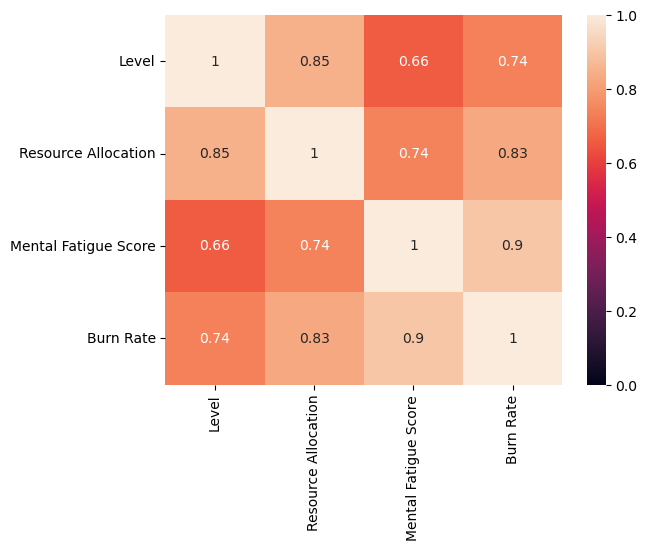

In [13]:
sns.heatmap(corr, vmin = 0.0, vmax = 1.00, annot = True)
plt.show()

# PART 2: PREDICTIVE ANALYTICS

### Load data and check

In [14]:
df = pd.read_csv('data/Burn_out_cs.csv',index_col = 0)
df

,Gender,Company Type,WFH Setup Available,Level,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of joining,,,,,,,
30/09/2008,Female,Service,No,2,3,3.8,0.16
30/11/2008,Male,Service,Yes,1,2,5.0,0.36
10/3/2008,Female,Product,Yes,2,4,5.8,0.49
3/11/2008,Male,Service,Yes,1,1,2.6,0.20
24/07/2008,Female,Service,No,3,7,6.9,0.52
...,...,...,...,...,...,...,...
30/12/2008,Female,Service,No,1,3,5.9,0.41
19/01/2008,Female,Product,Yes,3,6,6.7,0.59
5/11/2008,Male,Service,Yes,3,7,5.9,0.72


In [15]:
# Take data
mang_x = pd.concat((df['Resource Allocation'],df['Mental Fatigue Score'],df['Level']), axis = 1)
mang_y = df['Burn Rate']
X = mang_x.values
Y = mang_y.values
print(X.shape)
print(Y.shape)

(21626, 3)
(21626,)


In [16]:
X

array([[3. , 3.8, 2. ],
       [2. , 5. , 1. ],
       [4. , 5.8, 2. ],
       ...,
       [7. , 5.9, 3. ],
       [5. , 5.9, 2. ],
       [6. , 7.8, 3. ]])

In [17]:
Y

array([0.16, 0.36, 0.49, ..., 0.72, 0.52, 0.61])

In [18]:
print(X[0])

[3.  3.8 2. ]


In [19]:
print(Y[1])

0.36


In [20]:
print(Y.size)

21626


### Split data

In [73]:
np.random.seed(3)
rand_indices = np.arange(Y.size)
np.random.shuffle(rand_indices)

print(rand_indices.size)
print(rand_indices)

21626
[14813 18213 17069 ... 11513  1688  5994]


In [74]:
X[rand_indices[0]]
#Y[rand_indices[0]]

array([2. , 5.6, 1. ])

In [75]:
N_TRAIN = 20000
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)

[18951 11257 14373 ... 11513  1688  5994]


In [76]:
# Divide the data into test and training sets
x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)
x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(20000, 3) (20000,)
(1626, 3) (1626,)


### Create Linear Regression model

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
a = model.coef_
b = model.intercept_
y0_predict = model.predict(x_train)
print(y0_predict)
print(y_train)

[0.35334064 0.517426   0.63632837 ... 0.44625344 0.50247802 0.20556004]
[0.4  0.57 0.64 ... 0.43 0.48 0.23]


### Evaluation

In [26]:
r2 = model.score(x_train, y_train)
print(r2)

0.8684441321297798


In [27]:
q2 = model.score(x_test, y_test)
print(q2)

0.8688270800734332


### Apply model

In [28]:
y_predict = model.predict(x_test)
print(y_predict.shape)

(1626,)


In [29]:
## Calculate error residual
err = y_predict - y_test
print(np.mean(abs(err))/22.53)

0.0024590140595104983


In [30]:
y_predict = pd.DataFrame(y_predict)
y_test =pd.DataFrame(y_test)
final = pd.concat((y_predict,y_test), axis = 1)
final.columns = ['y_predict','y_test']
final.head(5)

,y_predict,y_test
0,0.358096,0.36
1,0.666563,0.67
2,0.478528,0.55
3,0.448122,0.35
4,0.439800,0.40


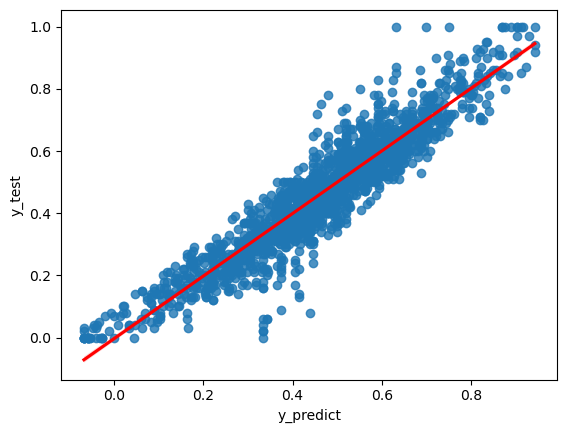

In [31]:
sns.regplot(data=final, x= 'y_predict', y= 'y_test', ci=95, line_kws = dict(color ='red'))
plt.show()

### Analytical model according to Company Type

In [32]:
df = pd.read_csv('data/Burn_out_cs.csv',index_col = 0)
df

,Gender,Company Type,WFH Setup Available,Level,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of joining,,,,,,,
30/09/2008,Female,Service,No,2,3,3.8,0.16
30/11/2008,Male,Service,Yes,1,2,5.0,0.36
10/3/2008,Female,Product,Yes,2,4,5.8,0.49
3/11/2008,Male,Service,Yes,1,1,2.6,0.20
24/07/2008,Female,Service,No,3,7,6.9,0.52
...,...,...,...,...,...,...,...
30/12/2008,Female,Service,No,1,3,5.9,0.41
19/01/2008,Female,Product,Yes,3,6,6.7,0.59
5/11/2008,Male,Service,Yes,3,7,5.9,0.72


In [33]:
lv = df['Level']
lv_ser = lv[df['Company Type'] == 'Service']
re_allo = df['Resource Allocation']
re_allo_ser = re_allo[df['Company Type'] == 'Service']
men_fatig_score = df['Mental Fatigue Score']
men_fatig_score_ser = men_fatig_score[df['Company Type'] == 'Service']
burn_rate = df['Burn Rate']

In [34]:
X_ser = pd.concat((lv_ser, re_allo_ser, men_fatig_score_ser), axis = 1).values
Y_ser = burn_rate[df['Company Type'] == 'Service']

In [35]:
Y_ser

Date of joining
30/09/2008    0.16
30/11/2008    0.36
3/11/2008     0.20
24/07/2008    0.52
2/1/2008      0.62
              ... 
23/12/2008    0.29
6/2/2008      0.67
30/12/2008    0.41
5/11/2008     0.72
10/1/2008     0.52
Name: Burn Rate, Length: 14124, dtype: float64

In [36]:
print(X_ser.shape)
print(Y_ser.shape)

(14124, 3)
(14124,)


In [37]:
# Create index
np.random.seed(3)
rand_indices = np.arange(Y_ser.size)
np.random.shuffle(rand_indices)

#print(rand_indices.size)
#print(rand_indices)

# Divide the data into test and training sets
N_TRAIN = 11000
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
#print(test_indices)

x_ser_train, y_ser_train = X_ser[train_indices], Y_ser[train_indices]

x_ser_test, y_ser_test = X_ser[test_indices], Y_ser[test_indices]


# Linear Regression model
from sklearn.linear_model import LinearRegression
model_ser = LinearRegression()
model_ser.fit(x_ser_train, y_ser_train)

a_ser = model_ser.coef_
b_ser = model_ser.intercept_


In [38]:
y0_predict_ser = model_ser.predict(x_ser_train)
y0_predict_ser[8]

0.6680396542492182

In [39]:
y_ser_train[8]

0.7

### Evaluation

In [40]:
r2 = model.score(x_ser_train, y_ser_train)
print(r2)

0.2998271153673969


In [41]:
q2 = model.score(x_ser_test, y_ser_test)
print(q2)

0.2834147834337568


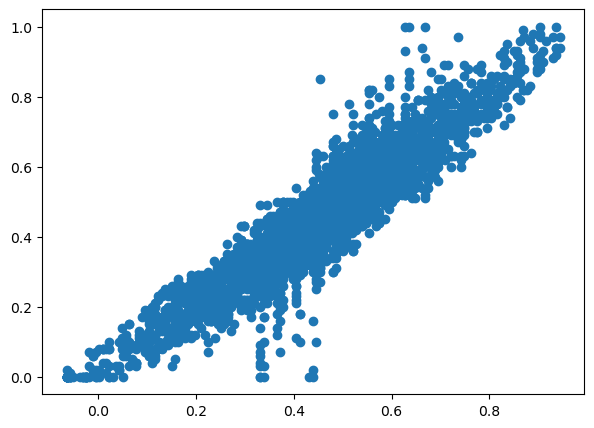

In [42]:
y_ser_predict = model_ser.predict(x_ser_test)
fig = plt.figure(figsize=[7,5]) 
plt.scatter(y_ser_predict, y_ser_test)

plt.show()

### Analytical model according to Gender

In [43]:
df

,Gender,Company Type,WFH Setup Available,Level,Resource Allocation,Mental Fatigue Score,Burn Rate
Date of joining,,,,,,,
30/09/2008,Female,Service,No,2,3,3.8,0.16
30/11/2008,Male,Service,Yes,1,2,5.0,0.36
10/3/2008,Female,Product,Yes,2,4,5.8,0.49
3/11/2008,Male,Service,Yes,1,1,2.6,0.20
24/07/2008,Female,Service,No,3,7,6.9,0.52
...,...,...,...,...,...,...,...
30/12/2008,Female,Service,No,1,3,5.9,0.41
19/01/2008,Female,Product,Yes,3,6,6.7,0.59
5/11/2008,Male,Service,Yes,3,7,5.9,0.72


In [44]:
lv = df['Level']
lv_male = lv[df['Gender'] == 'Male']
re_allo = df['Resource Allocation']
re_allo_male = re_allo[df['Gender'] == 'Male']
men_fatig_score = df['Mental Fatigue Score']
men_fatig_score_male = men_fatig_score[df['Gender'] == 'Male']
burn_rate = df['Burn Rate']

In [45]:
X_male = pd.concat((lv_male, re_allo_male, men_fatig_score_male), axis = 1).values
Y_male = burn_rate[df['Gender'] == 'Male']
X_male.shape
Y_male.shape

(10277,)

In [46]:
# Create index
np.random.seed(3)
rand_indices = np.arange(Y_male.size)
np.random.shuffle(rand_indices)

#print(rand_indices.size)
#print(rand_indices)

# Divide the data into test and training sets
N_TRAIN = 9999
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
#print(test_indices)

x_male_train, y_male_train = X_male[train_indices], Y_male[train_indices]
#print(x_EWR_train.shape, y_EWR_train.shape)
x_male_test, y_male_test = X_male[test_indices], Y_male[test_indices]
#print(x_EWR_test.shape, y_EWR_test.shape)

# Linear Regression model
from sklearn.linear_model import LinearRegression
model_male = LinearRegression()
model_male.fit(x_male_train, y_male_train)

a_male = model_male.coef_
b_male = model_male.intercept_


In [47]:
y0_predict_male = model_male.predict(x_male_train)
y0_predict_male[4]

0.045016268206593435

In [48]:
y_male_train[4]

0.05

### Evaluation

In [49]:
r2 = model.score(x_male_train, y_male_train)
print(r2)

0.24628274054678934


In [50]:
q2 = model.score(x_male_test, y_male_test)
print(q2)

0.3017338373100956


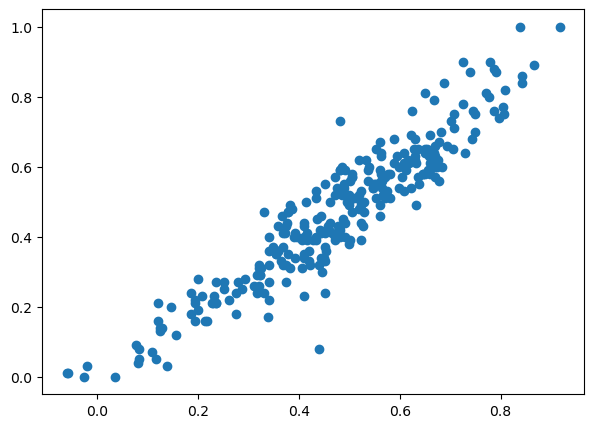

In [51]:
y_male_predict = model_male.predict(x_male_test)
fig = plt.figure(figsize=[7,5]) 
plt.scatter(y_male_predict, y_male_test)

plt.show()

Comment:  
 - Model scores r2 and q2 are very low
 - Separate models for each type of company and gender are not as good as the general model

# PART 3: DASHBOARD

## Display Dashboard by Level, Company Type, Resource Allocation by Gender (Male/Female/All):

In [52]:
a = df[df['Gender'] == 'Male']

In [53]:
a1 = df[df['Gender'] == 'Female']

In [54]:
b = a.groupby('Level')

In [55]:
b1 = a1.groupby('Level')

In [56]:
#Female
c1 = b1['Burn Rate']

In [57]:
c1.sum().sum()

4798.219999999999

In [58]:
c1.sum()/4798.22

Level
0    0.027679
1    0.174692
2    0.329191
3    0.305449
4    0.131886
5    0.031103
Name: Burn Rate, dtype: float64

In [59]:
b['Burn Rate'].mean()

Level
0    0.151434
1    0.314165
2    0.457703
3    0.569889
4    0.686411
5    0.852167
Name: Burn Rate, dtype: float64

In [60]:
palette_plotly = px.colors.qualitative.Plotly
palette_plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

In [78]:
para = ['Company Type', 'Gender', 'WFH Setup Available','Level','Resource Allocation']
def CompareBurnoutrate(para,gender = 'All'):
    if 'all' in gender.lower():
        df_temp = df
    else:
        df_temp = df[df['Gender'] == gender]
    df_counts = df_temp.groupby(para)['Burn Rate'].sum()/df_temp.groupby(para)['Burn Rate'].sum().sum()
    
    fig = make_subplots(rows=1, cols=2, 
                        subplot_titles=("Compare By Value", "Compare By Rate"), 
                        column_widths=[0.6, 0.4],
                        specs=[[{"type": "xy"}, {"type": "domain"}]]
                       )
    goBar = go.Bar(x=df_counts.index, y=df_counts.values, 
                   width=0.3, marker=dict(color=palette_plotly),
                   showlegend=False
                  ) # color
    goPie = go.Pie(labels=df_counts.index, values=df_counts.values,
                   showlegend=True, marker=dict(colors=palette_plotly),
                   hole=.3,
                  ) # colors
    fig.add_trace(goBar, row=1, col=1)
    fig.add_trace(goPie, row=1, col=2)
    fig.update_layout(width=600, height=300, 
                      margin={"r":0,"t":50,"l":0,"b":0},
                      title=f'BURN-RATE COMPARISON CHART BY: {para}')
    return fig

### Test the operation of the above function with some options

In [79]:
CompareBurnoutrate('Resource Allocation')

In [63]:
# Create output
output = widgets.Output(layout=dict(border='1px solid red', width='1000px', height='950px'))

In [80]:
# Create a title for the output using Label
labelLayout = {'border': '1px solid black', 'background':'green',
               'justify_content':'center', 'display':'flex'}
wLabel = widgets.Label(value='GENDER: ALL', layout=labelLayout)

In [81]:
# Display all output
wSel = widgets.Select(description ='Gender', options = ['Male','Female', 'All'])
right_box = widgets.VBox([wLabel, output])
dashboard = widgets.HBox([wSel,right_box])
display(dashboard)

In [82]:
# Display figures on the right chart area (output)
fig1 = CompareBurnoutrate('Level')
fig2 = CompareBurnoutrate('Company Type')
fig3 = CompareBurnoutrate('WFH Setup Available')

with output:
    output.clear_output()
    fig1.show()
    fig2.show()
    fig3.show()


In [83]:
def apply2(gender):
    if gender == 'All':
        wLabel.value = 'GENDER: ALL'
    else:
        wLabel.value = 'GENDER: ' + gender
        
    fig1 = CompareBurnoutrate('Level', gender)
    fig2 = CompareBurnoutrate('Company Type', gender)
    fig3 = CompareBurnoutratet('WFH Setup Available',gender)
  
    with output:
        output.clear_output()
        fig1.show()
        fig2.show()
        fig3.show()
  
a = widgets.interactive(apply2, gender=wSel)